In [1]:
# Note that this works in the segment version with temperature dependant properties
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from Segment import Segment, Body, _build_testbody

In [2]:
# temstep updating function for testing 

def lsp_10(pname, a, tsets):
    def lm(body_tree, body_params):
        base = body_tree.get_param(pname, True)
        temp = body_tree.get_temps()
        nprms = list(base + (a * base * (temp - tsets)))
        return nprms
    return lm 

In [3]:
# Now building a body out of the segments 

body = _build_testbody()

In [4]:
body.body_tree.get_param("name")

['A', 'B', 'C', 'D', 'E']

In [5]:
settemps = np.array([30.0, 31.0, 32.0, 33.0, 34.0])
body.register_tree_update("env", lsp_10("env", 0.1, settemps))
body.register_tree_update("qmet", lsp_10("qmet", -0.1, settemps))

body.register_log_parameter("temp", "tree")
body.register_log_parameter("qmet", "tree")
body.register_log_parameter("env", "tree")
body.register_log_parameter("store", "tree")

In [6]:
log = body.run_constant_temp(1, 10, 10)
tvals = np.asarray(log["temp"])

In [7]:
names = body.body_tree.get_names() 

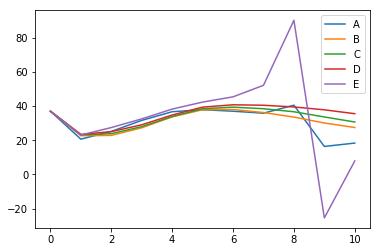

In [8]:
fig_t = plt.figure()
ax_t = fig_t.add_subplot(111)
for i, name in enumerate(names):
    ax_t.plot(tvals[:,i], label=name)

ax_t.legend()

In [9]:
lstring = "{:10.1f}  {:10.1f}  {:10.1f}  {:10.1f}  {:10.1f}"
for i in log["env"]:
    print(lstring.format(*i))

       2.0         5.0         8.0        11.0        15.0
       0.1         0.8         0.9         0.5        -1.4
       0.1         0.1         0.2         0.1        -0.5
       0.1         0.1         0.1         0.1        -0.4
       0.1         0.1         0.1         0.1        -0.6
       0.2         0.2         0.2         0.1        -1.1
       0.4         0.3         0.3         0.2        -2.3
       0.6         0.5         0.6         0.3        -6.5
       1.3         0.7         0.8         0.6       -42.9
      -0.5         0.6         1.0         0.8       212.3
       0.1         0.4         0.8         1.1      -342.4


In [10]:
for i in log["temp"]:
    print(lstring.format(*i))

      37.0        37.0        37.0        37.0        37.0
      20.6        22.6        23.2        23.4        23.1
      25.2        22.8        23.8        25.0        27.4
      31.6        27.3        27.9        29.0        32.5
      36.7        33.7        33.9        34.8        38.2
      37.9        37.9        38.4        39.4        42.4
      37.0        38.0        39.4        40.8        45.4
      35.8        36.2        38.5        40.5        52.2
      40.5        33.6        36.7        39.5        90.3
      16.4        30.1        33.6        37.8       -25.5
      18.3        27.5        30.7        35.5         7.9


In [11]:
for i in log["qmet"]:
    print(lstring.format(*i))

       3.0         6.0         9.0        12.0        16.0
       5.8        11.0        16.9        23.5        33.5
       8.6        20.0        30.8        42.2        55.5
       7.2        27.5        43.3        58.9        63.8
       2.4        20.1        35.1        48.5        36.7
       0.5         6.3        12.5        17.5         6.1
       0.2         1.9         3.3         3.9        -0.9
       0.1         0.9         1.2         1.0         0.7
      -0.0         0.7         0.6         0.3        -3.2
      -0.0         0.7         0.5         0.2       -22.5
      -0.0         1.0         0.6         0.1       -81.4


In [12]:
for i in log["store"]:
    print(lstring.format(*i))

       1.0         4.0         7.0        10.0        13.0
       1.0         4.0         7.0        10.0        13.0
       1.0         4.0         7.0        10.0        13.0
       1.0         4.0         7.0        10.0        13.0
       1.0         4.0         7.0        10.0        13.0
       1.0         4.0         7.0        10.0        13.0
       1.0         4.0         7.0        10.0        13.0
       1.0         4.0         7.0        10.0        13.0
       1.0         4.0         7.0        10.0        13.0
       1.0         4.0         7.0        10.0        13.0
       1.0         4.0         7.0        10.0        13.0


In [13]:
_build_testbody().body_tree.build_temp_matrix(1)

array([[ 3.8, -0.1, -0.2,  0. , -0.5],
       [-0.1,  9.1,  0. ,  0. ,  0. ],
       [-0.2,  0. , 15.5, -0.3,  0. ],
       [ 0. ,  0. , -0.3, 21.3,  0. ],
       [-0.5,  0. ,  0. ,  0. , 28.5]])